In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
from transformers import AutoImageProcessor, DeiTForImageClassificationWithTeacher
import torch
from torchvision import datasets, transforms
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


def get_test_transforms(input_size=224):
    # mean, std = [0.0097, 0.2639, 0.6058],[0.9863, 0.9759, 1.1187]
    transformations = {}
    transformations= transforms.Compose(
        [transforms.Resize(input_size, interpolation=3),
         transforms.CenterCrop(input_size),
         transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
        # transforms.Grayscale(),`
         transforms.ToTensor(),
    # transforms.Normalize(mean, std),
        ])
    return transformations

train_dataset = datasets.ImageFolder(root='/Users/keito/Desktop/img/train', transform=get_test_transforms())
val_dataset = datasets.ImageFolder(root='/Users/keito/Desktop/img/val', transform=get_test_transforms())


from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


from transformers import DeiTForImageClassificationWithTeacher

model = DeiTForImageClassificationWithTeacher.from_pretrained('facebook/deit-base-distilled-patch16-224')

import torch.optim as optim
import torch.nn as nn

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

def train(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)

        loss = criterion(outputs.logits, labels)
        total_loss += loss.item()

        loss.backward()

        optimizer.step()


    average_loss = total_loss / len(train_loader)
    return average_loss



In [24]:
def calculate_mean_std(dataloader):
    channels_sum, channels_squared_sum, num_batches = 0, 0, 0

    for data, _ in dataloader:
        channels_sum += torch.mean(data, dim=[0, 2, 3])
        channels_squared_sum += torch.mean(data**2, dim=[0, 2, 3])
        num_batches += 1

    mean = channels_sum / num_batches
    std = (channels_squared_sum / num_batches - mean**2)**0.5

    return mean, std

mean, std = calculate_mean_std(train_loader)
print(f"Mean: {mean}")
print(f"Std: {std}")
calculate_mean_std(dataloader)


KeyboardInterrupt



In [3]:
def validate(model, val_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)

            loss = criterion(outputs.logits, labels)
            total_loss += loss.item()

            _, predicted = torch.max(outputs.logits, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    average_loss = total_loss / len(val_loader)
    accuracy = 100 * correct / total
    return average_loss, accuracy


In [4]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 10

for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    val_loss, val_accuracy = validate(model, val_loader, criterion, device)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}%")

Epoch 1, Train Loss: 1.0425177549321283, Validation Loss: 0.7008413238280923, Validation Accuracy: 79.34712911687555%
Epoch 2, Train Loss: 0.5837089818467057, Validation Loss: 0.5679504651388976, Validation Accuracy: 83.1244535120956%
Epoch 3, Train Loss: 0.4834047444626818, Validation Loss: 0.4420983209556534, Validation Accuracy: 86.9309239288837%
Epoch 4, Train Loss: 0.4194952034902132, Validation Loss: 0.4582022636143744, Validation Accuracy: 86.02156805596036%
Epoch 5, Train Loss: 0.3713090270696648, Validation Loss: 0.36776146534188636, Validation Accuracy: 88.77295249198484%
Epoch 6, Train Loss: 0.33641619511884124, Validation Loss: 0.323252580334559, Validation Accuracy: 90.12532789274265%
Epoch 7, Train Loss: 0.3069008856923741, Validation Loss: 0.32987569688459045, Validation Accuracy: 89.9446225590207%
Epoch 8, Train Loss: 0.28752015053087326, Validation Loss: 0.3171595048997898, Validation Accuracy: 90.24774118332847%
Epoch 9, Train Loss: 0.2683204119881624, Validation Loss

In [4]:
%env PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:100

env: PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:100


In [5]:
torch.save(model.state_dict(), 'model_deit_16_224_batch32_airline_dirty.pth')

In [ ]:
Ac 88

In [ ]:
`batch 32
 83.61276050762604%

In [ ]:
facebook/deit-base-distilled-patch16-384


Epoch 1, Train Loss: 1.2834445801224543, Validation Loss: 1.1298887333541643, Validation Accuracy: 67.19342604298356%
Epoch 2, Train Loss: 1.1603675338921868, Validation Loss: 1.0750638169839102, Validation Accuracy: 69.13573152511205%
Epoch 3, Train Loss: 1.2104356321207321, Validation Loss: 1.182404164042536, Validation Accuracy: 66.15331571083783%
Epoch 4, Train Loss: 1.2113494933411861, Validation Loss: 1.2457397731503828, Validation Accuracy: 64.27422135386738%
Epoch 5, Train Loss: 1.2255239039573875, Validation Loss: 1.1403780703292474, Validation Accuracy: 66.94632800827492%

In [ ]:
batch 32
normarization
`
Epoch 1, Train Loss: 1.1441896153479931, Validation Loss: 0.8961359105374226, Validation Accuracy: 73.37087691069992%
Epoch 2, Train Loss: 0.8034051600214367, Validation Loss: 0.7645343799308381, Validation Accuracy: 77.37041719342605%
Epoch 3, Train Loss: 0.7498982128597517, Validation Loss: 0.7806886134244183, Validation Accuracy: 76.7727847373865%

In [4]:
pip install japanize-matplotlib


     ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.1 MB 960.0 kB/s eta 0:00:05
     --- ------------------------------------ 0.3/4.1 MB 3.3 MB/s eta 0:00:02
     ------ --------------------------------- 0.7/4.1 MB 4.9 MB/s eta 0:00:01
     ----------- ---------------------------- 1.2/4.1 MB 6.2 MB/s eta 0:00:01
     ---------------- ----------------------- 1.7/4.1 MB 7.2 MB/s eta 0:00:01
     --------------------- ------------------ 2.3/4.1 MB 8.0 MB/s eta 0:00:01
     --------------------------- ------------ 2.8/4.1 MB 8.5 MB/s eta 0:00:01
     -------------------------------- ------- 3.4/4.1 MB 8.9 MB/s eta 0:00:01
     ------------------------------------- -- 3.9/4.1 MB 9.2 MB/s eta 0:00:01
     ---------------------------------------- 4.1/4.1 MB 9.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: start

In [21]:
##　実装

In [16]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from transformers import AutoImageProcessor, DeiTForImageClassificationWithTeacher

# モデルの定義（例：DeiTモデル）
model = DeiTForImageClassificationWithTeacher.from_pretrained('facebook/deit-base-distilled-patch16-224')

# 保存された重みの読み込み
model.load_state_dict(torch.load('model_deit_16_224_batch32_airline_dirty.pth'))

# 推論モードに設定
model.eval()

# 画像の前処理
transform = transforms.Compose([
    transforms.Resize(224, interpolation=3),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    # 必要に応じて他の変換を追加
])


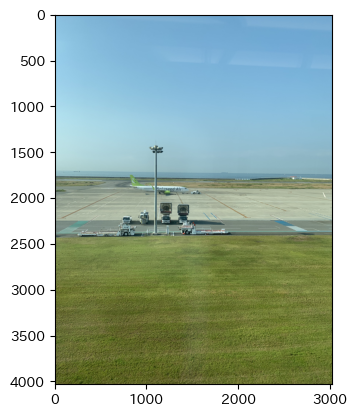

クラス 全日空 の確率: 0.3374135494232178
クラス 日本航空 の確率: 0.25488385558128357
クラス 琉球エアーコミューター の確率: 0.24660450220108032
クラス アイベックスエアラインズ の確率: 0.03937695920467377
クラス 日本エアコミューター の確率: 0.026981482282280922
クラス フジドリームエアラインズ の確率: 0.026500971987843513
クラス オリエンタルエアブリッジ の確率: 0.01541833020746708
クラス AIRDO の確率: 0.014171251095831394
クラス 日本トランスオーシャン航空 の確率: 0.01168121863156557
クラス スターフライヤー の確率: 0.00866196770220995


In [24]:
import japanize_matplotlib

# 画像の読み込みと前処理
image_path = '/Users/keito/Desktop/tests/IMG_3381.jpg'
image = Image.open(image_path)
image_tensor = transform(image).unsqueeze(0) 

with torch.no_grad():
    output = model(image_tensor)
    probabilities = torch.nn.functional.softmax(output.logits, dim=1)
    top_prob, top_catid = torch.topk(probabilities, 10)

imagenet_classes = {
  0: "AIRDO",
  1: "天草エアライン",
  2: "全日空",
  3: "ピーチ",
  4: "フジドリームエアラインズ",
  5: '北海道エアコミューター', 
  6: "アイベックスエアラインズ",
  7: "日本エアコミューター",
  8: "日本航空",
  9: "ジェットスター・ジャパン",
  10: "日本トランスオーシャン航空",
  11: "オリエンタルエアブリッジ",
  12: "琉球エアーコミューター",
  13: "スターフライヤー",
  14: "スプリング・ジャパン",
  15: "スカイマーク",
  16: "ソラシド エア",
  17: "ジップエア"
}


# 画像と予測結果の表示
plt.imshow(image)
plt.show()
# 予測結果の表示
for i in range(top_prob.size(1)):
    print(f"クラス {imagenet_classes[top_catid[0][i].item()]} の確率: {top_prob[0][i].item()}")
